# Introduction

This project will investigate the relationship between the Gross Domestic Product (GDP) and life expectancy, using World Health Organization (WHO) data for 6 countries: Chile, China, Germany, Mexico, USA and Zimbabwe.

The project will prepare the data, and afterward analyze it via a series of plots that will respond to the following investigation questions:

-What is the center and spread distribution of life expectancy?
-What is the center and spread distribution of Gross Domestic Product (GDP)?
-How has life expectancy developed in these 6 countries over the past few years?
-How has GDP developed in these 6 countries over the past few years?
-What is the relation between life expectancy and GDP?

## Python libraries 

The following libraries are imported to the file in order to manage the data:

In [104]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

## Import and initial exploration of the data

The data used for this project (2000-2015) is loaded in a file called all_data.csv, this will be loaded to a Pandas dataframe in order to manipulate it with Python:



In [4]:
df=pd.read_csv('all_data.csv')

The methods .head() and .info() will be executed in order to have an initial overview of our data:

In [5]:
print(df.head())
df.info()


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


It is now clear to us that our dataframe is full (no-null values), we have in total 16 years for each of the 6 countries that we will analyze (6x16=96 total). Also, it is important to note that we have 4 columns: `Country`, `year`, `life expectancy at birth` and `GDP`. Our next move will be reviewing which years of data we have in our df.

In [6]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

It is now clear that we are dealing with information between 2000 and 2015.

## Data cleaning

Our dataset is fairly organized, there are no missing values and it is quite succinct. Nevertheless, the name of our third column might be problematic in further steps of our process. Therefore, we will rename it to *Life_expectancy*.

In [23]:
df = df.rename({"Life expectancy at birth (years)":"life_expectancy"}, axis = "columns")
df.head()

,Country,Year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


A seconday dataframe will be created in order to explore (in the next steps) the distribution of the means of the values of our dataset. This `dfM` will be created as follows:

In [33]:
dfM=df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfM

,Country,life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


## Data exploration

In order to have a clearer grasp of the information at hand, a group of exploratory plots were prepared. The first one is a histogram of all the `GDP` values found within our dataset. We can note that the distribution of this dataset is very right-skewed. Hence, there is a marked group of countries with a significantly lower GDP in comparison to a couple of high-value countries.


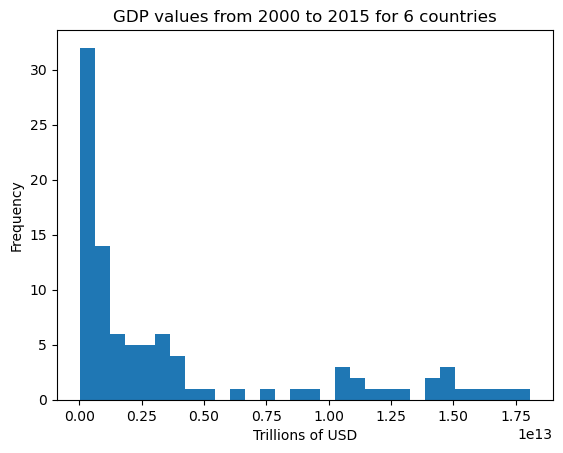

<Figure size 640x480 with 0 Axes>

In [21]:
plt.hist(df.GDP, bins=30)
plt.title('GDP values from 2000 to 2015 for 6 countries')
plt.xlabel('Trillions of USD')
plt.ylabel('Frequency')
plt.show()
plt.clf()

Next, we will plot the `Life expectancy at birth` with another histogram, we can notice that this graph is very left-skewed, and there are certain subdistributions within the dataset.

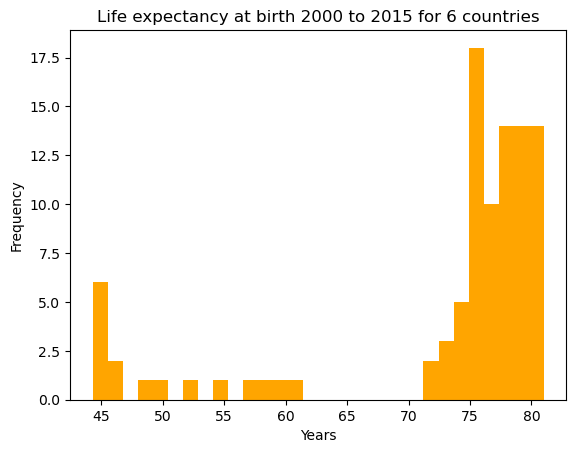

<Figure size 640x480 with 0 Axes>

In [41]:
plt.hist(df.life_expectancy, bins=30, color='orange')
plt.title('Life expectancy at birth 2000 to 2015 for 6 countries')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()
plt.clf()

Next up we will be analyzing the information of our secondary dataframe (`dfM`), in order to do so we will be using bar plots with the seaborn library:


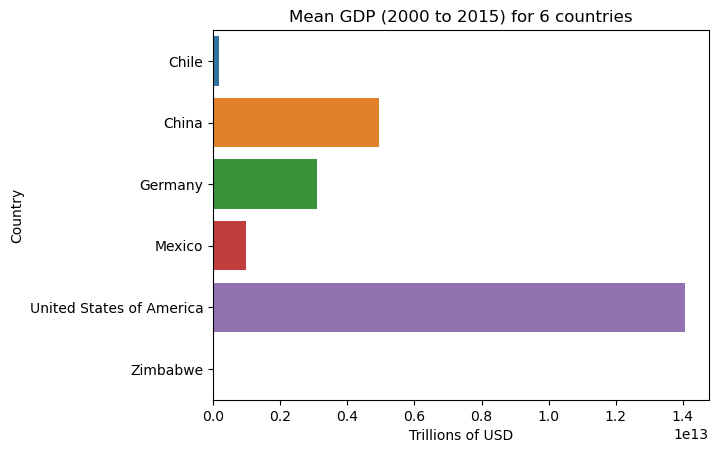

<Figure size 640x480 with 0 Axes>

In [40]:
sns.barplot(y="Country", x="GDP", data=dfM)
plt.title('Mean GDP (2000 to 2015) for 6 countries')
plt.xlabel('Trillions of USD')
plt.ylabel('Country')
plt.show()
plt.clf()

We can note that there is a huge gap between USA and Chile or Zimbabwe, this is the reason behind the power-like distribution found in our histograms. Our next plot will be another bar plot, but in this case we will be looking at `Life expectancy at birth`.

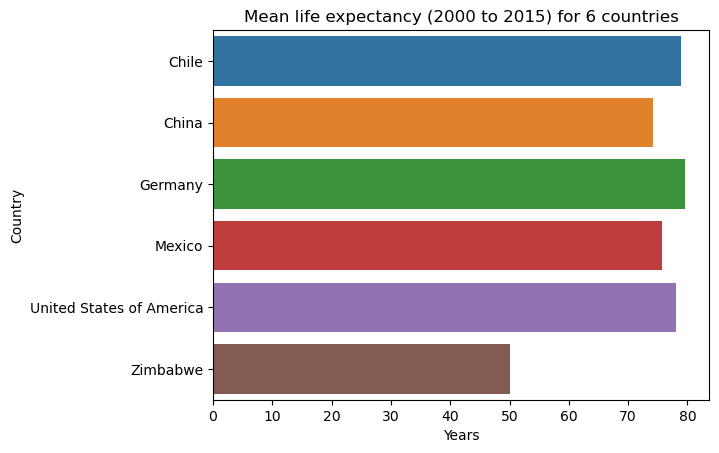

<Figure size 640x480 with 0 Axes>

In [39]:
sns.barplot(y="Country", x="life_expectancy", data=dfM)
plt.title('Mean life expectancy (2000 to 2015) for 6 countries')
plt.xlabel('Years')
plt.ylabel('Country')
plt.show()
plt.clf()

Just as in the `GDP` graph, we can notice that the subdistribution noticed in the histogram of our `Life Expectancy at Birth` was due to Zimbabwe's values in the graph. Our final exploratory plot will be a boxplot, this will enable us to evaluate and compare the `GDP` and `Life Expectancy at Birth` both center and spread at the same time:


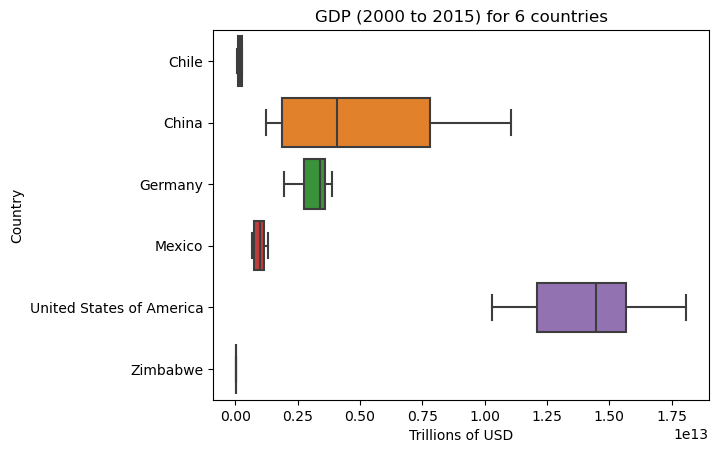

<Figure size 640x480 with 0 Axes>

In [38]:
sns.boxplot(y="Country", x="GDP", data=df)
plt.title('GDP (2000 to 2015) for 6 countries')
plt.xlabel('Trillions of USD')
plt.ylabel('Country')
plt.show()
plt.clf()

This plot provides valuable information regarding the year-by-year change on the data. It is clear that the country with the highest GDP change in the 2000-2015 year span is China, followed closely by USA. It is also clear that in comparison, Chile and Zimbabwe have made little change in the same period. The same plot is shown for `Life expectancy at birth`:

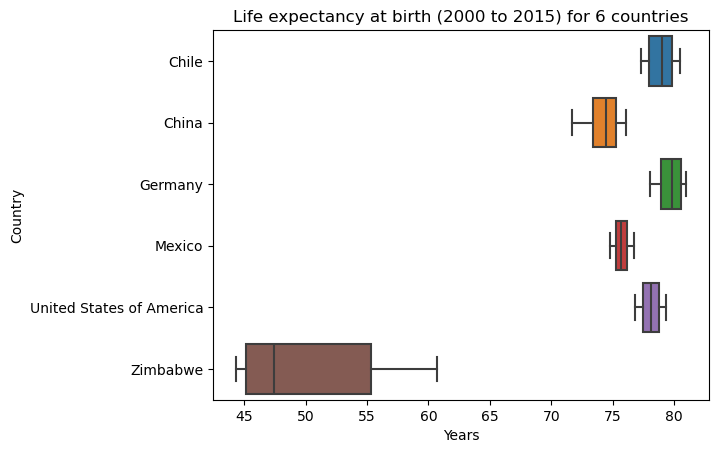

<Figure size 640x480 with 0 Axes>

In [43]:
sns.boxplot(y="Country", x="life_expectancy", data=df)
plt.title('Life expectancy at birth (2000 to 2015) for 6 countries')
plt.xlabel('Years')
plt.ylabel('Country')
plt.show()
plt.clf()

This plot allows us to notice clearly that the country that has changed the most its life expectancy at birth is Zimbabwe. Nevertheless it is still the country with the lowest value so far. There are still other plots required to be sure, but it seems like `GDP` and `Life Expectancy at Birth` show some kind of relation.

## Linear and scatter plots

In order to fully visualize the development of `GDP` and `Life Expectancy at Birth`, given that these are time series data, is by plots such as line plots or scatter plots. First of all we will be inspecting a simple line plot for both variables:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


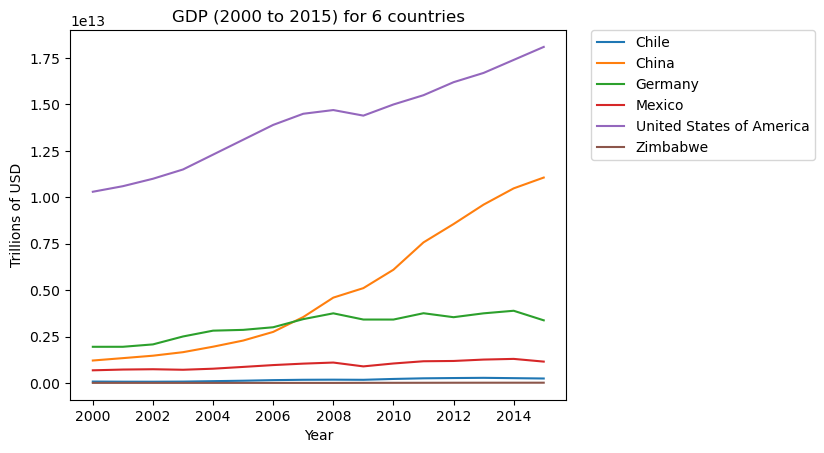

<Figure size 640x480 with 0 Axes>

In [50]:
sns.lineplot(y="GDP", x="Year", hue='Country', data=df)
plt.title('GDP (2000 to 2015) for 6 countries')
plt.xlabel('Year')
plt.ylabel('Trillions of USD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.clf()

We can notice that the Chinese GDP grows at the highest rate, while the USA's GDP is second at the growth rate. The same analysis will be made for `Life Expectancy at Birth`:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


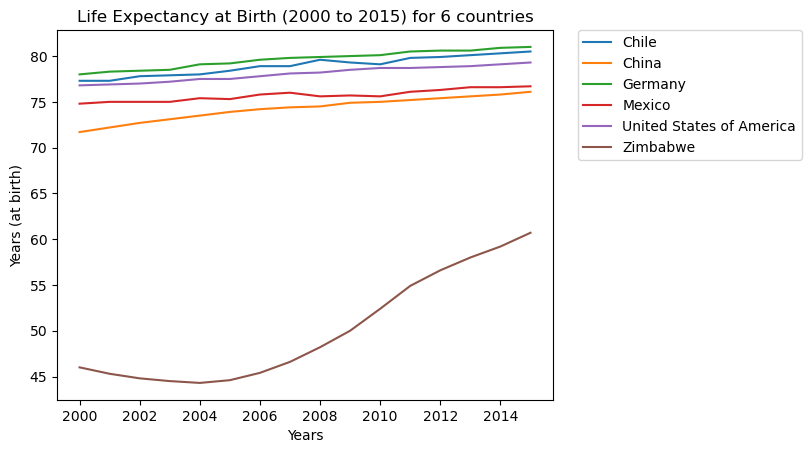

<Figure size 640x480 with 0 Axes>

In [51]:
sns.lineplot(y="life_expectancy", x="Year", hue='Country', data=df)
plt.title('Life Expectancy at Birth (2000 to 2015) for 6 countries')
plt.xlabel('Years')
plt.ylabel('Years (at birth)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.clf()

It is clear again the fact that the country with the highest change in life expectancy is Zimbabwe, but now we can observe that it actually fell at the beginning of the century and later resurfaced at a peak 60 years at 2015. For the rest of the countries, it has shown a small but steady increment. It is clear from the plots seen so far that there is quite a difference between the value ranges from one country to another, hence individual graphs would provide further insight on each country's evolution:

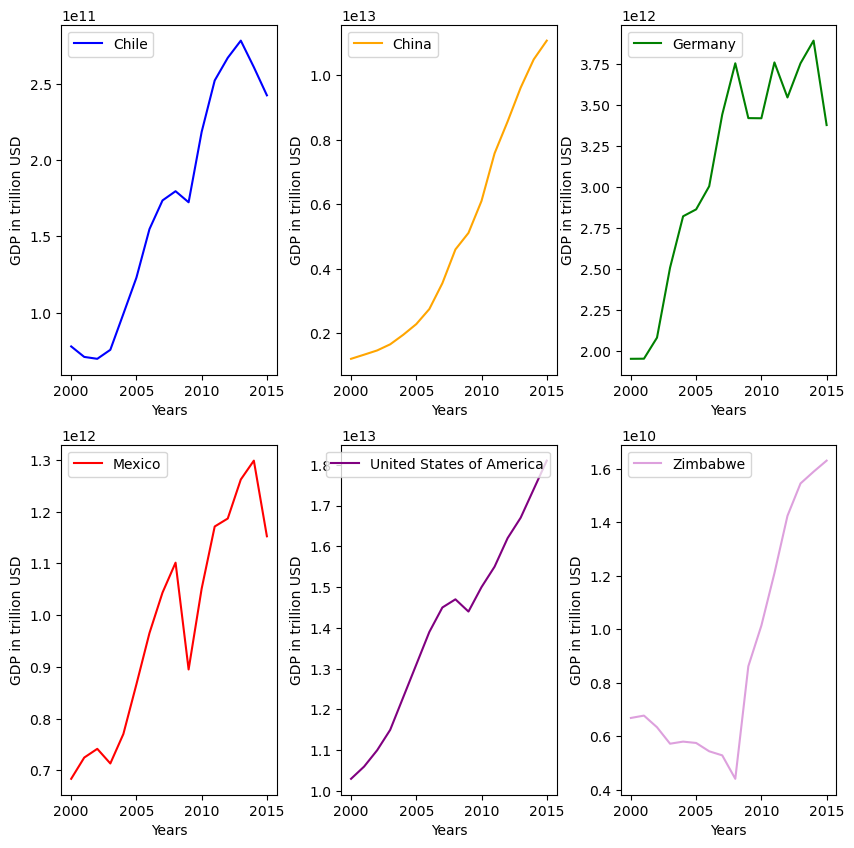

In [93]:
plt.figure(figsize=(10,10))
i=1
con_list=df.Country.unique()
col=['','blue','orange','green','red', 'plum', 'purple']

for con in con_list:
    plt.subplot(2,3,i)
    dfi=df[df.Country == con]
    plt.plot(dfi.Year,dfi.GDP, color=col[i])
    plt.legend([con])
    plt.xlabel('Years')
    plt.ylabel('GDP in trillion USD')
    plt.subplots_adjust(wspace=0.3)
    i+=1

Individual graphs allow us to note data that was not so clear on general graphs: for example, the GDP of Zimbabwe increased more than two-fold between 2008 and 2015. Also the 6 countries we are analyzing have shown an increase in their GDP in the 15 years of the data. Let's now focus on the life expectancy tendency of these nations:

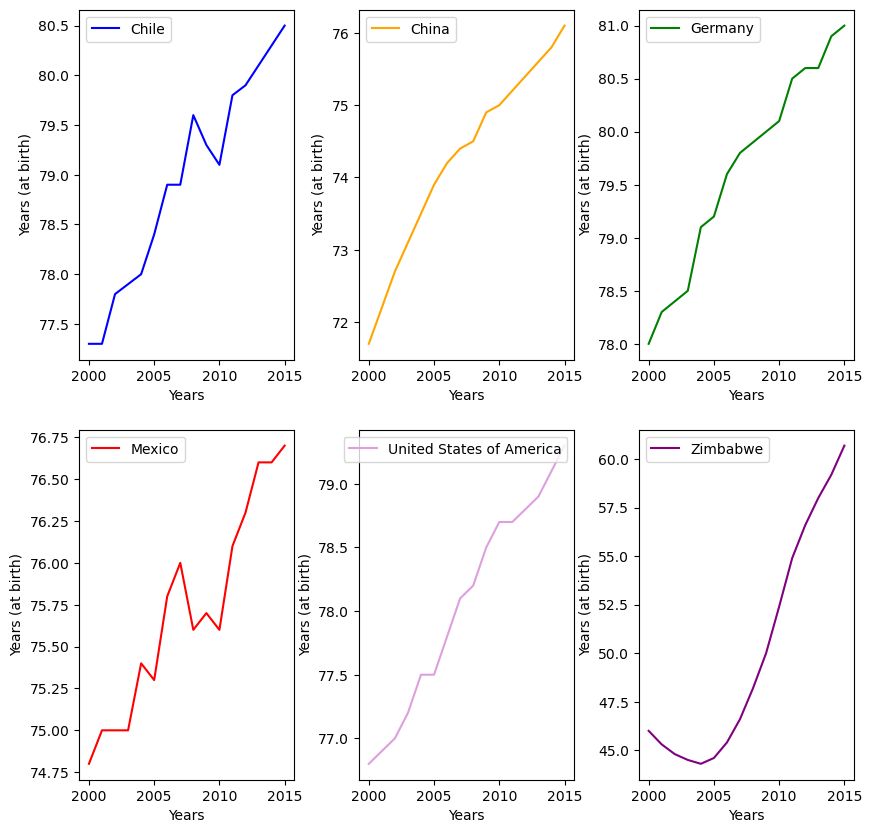

In [94]:
plt.figure(figsize=(10,10))
j=1
nat_list=df.Country.unique()
hue=['','blue','orange','green','red', 'plum', 'purple']

for nat in nat_list:
    plt.subplot(2,3,j)
    dfj=df[df.Country == nat]
    plt.plot(dfj.Year,dfj.life_expectancy, color=hue[j])
    plt.legend([nat])
    plt.xlabel('Years')
    plt.ylabel('Years (at birth)')
    plt.subplots_adjust(wspace=0.3)
    j+=1

## Bivariate analysis

Given that it is clear now that evaluating all 6 nations at once in a single graph will provide unsufficient information, we will focus on a bivariate analysis country by country, employing a scatter plot:


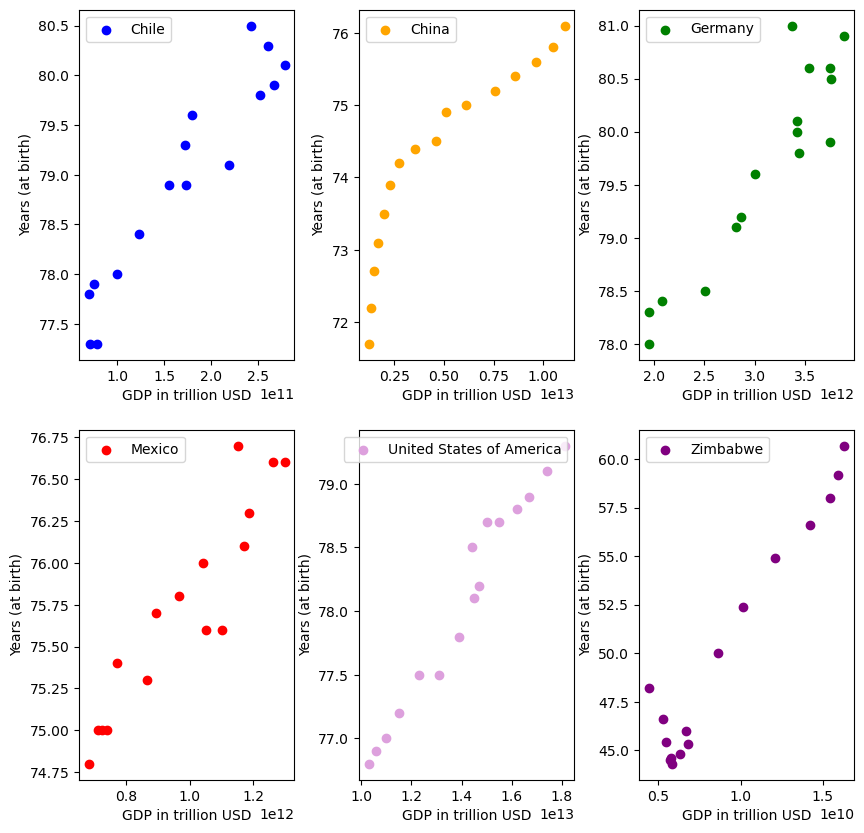

In [97]:
plt.figure(figsize=(10,10))
k=1
pai_list=df.Country.unique()
tin=['','blue','orange','green','red', 'plum', 'purple']

for pai in pai_list:
    plt.subplot(2,3,k)
    dfk=df[df.Country == pai]
    plt.scatter(x=dfk.GDP,y=dfk.life_expectancy, color=tin[k])
    plt.legend([pai])
    plt.xlabel('GDP in trillion USD')
    plt.ylabel('Years (at birth)')
    plt.subplots_adjust(wspace=0.3)
    k+=1

The resulting scatter plots show a clear positive correlation between `GDP` and `Life expectancy at birth`. In order to fully portray the nature of this correlation, we will perform a linear regression analysis on each country:

In [108]:
co_list=df.Country.unique()

for co in co_list:
    dfl=df[df.Country == co]
    variable, p=pearsonr(dfl.GDP,dfl.life_expectancy)
    print( 'The pearson correlation coefficient for ' + str(co) + ' is: \n' + str(variable) + '. With a p-value of: ' + str(p))

The pearson correlation coefficient for Chile is: 
0.9498766659254416. With a p-value of: 1.8659139746585315e-08
The pearson correlation coefficient for China is: 
0.9085255408648358. With a p-value of: 1.125098572070064e-06
The pearson correlation coefficient for Germany is: 
0.9326988982561268. With a p-value of: 1.4018815534045922e-07
The pearson correlation coefficient for Mexico is: 
0.9322377167847081. With a p-value of: 1.4686960248304982e-07
The pearson correlation coefficient for United States of America is: 
0.9817092382430257. With a p-value of: 1.749970926909946e-11
The pearson correlation coefficient for Zimbabwe is: 
0.9661998955858777. With a p-value of: 1.2358516366846197e-09


The correlation coefficient of all the 6 countries analyzed is at least 0.90, with USA being the highest at 0.98. This, along with the graphical evidence shown before, shows that there is a clear relationship between `GDP` and `Life expectancy at birth`.

## Conclusions

This project was able to show that there is indeed a correlation between `GDP` and `Life Expectancy`, as well as providing insight on the different research questions. The most relevant observations are summarized as follows:

-There is a significant difference in the `GDP` value from country to country, being USA and China the highest grossing countries and Chile and Zimbabwe being the lowest.

-In spite of the fact that it is the country with the lowest `life expectancy`, Zimbabwe is the country with the highest increase on it's `life expectancy` between 2000 and 2015.

-All countries selected for this analysis showed an increase in both `GDP` and `life expectancy` between 2000 and 2015.

-There is a clear correlation (above 0.9 Pearson R) between `GDP` and `life expectancy` for all of the studied countries.

## Data source

-GDP Source: World Bank national accounts data, and OECD National Accounts data files. 2015
-
Life expectancy Data Source: World Health Organizati. 2015on